In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression

# Data Cleansing

In [6]:
df = pd.read_csv("BankChurners.csv")
print(df.shape)

#dataset owner suggests dropping these 2 columns
df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", \
                 "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], \
        inplace = True)

print(df.info())
print(df.isnull().sum())
print(df.head())

(10127, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64

In [3]:
print(df.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64


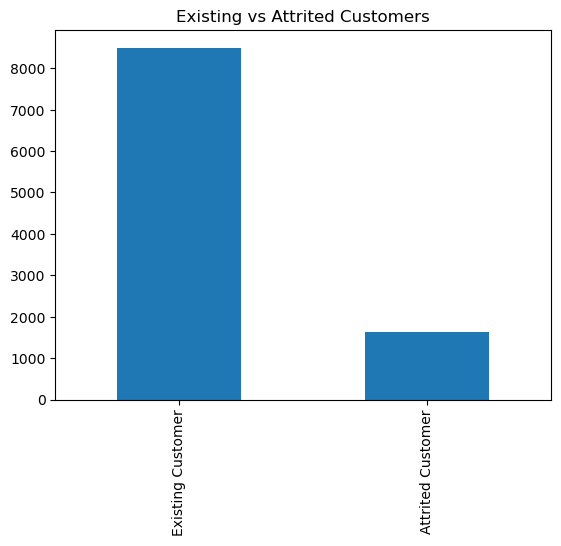

In [7]:
#1 Attrition Flag
print(df["Attrition_Flag"].value_counts(normalize=True))
df["Attrition_Flag"].value_counts().plot(kind="bar")
plt.title("Existing vs Attrited Customers")
plt.show()

# Customer Demographics, Transactionals vs Customer Attrition

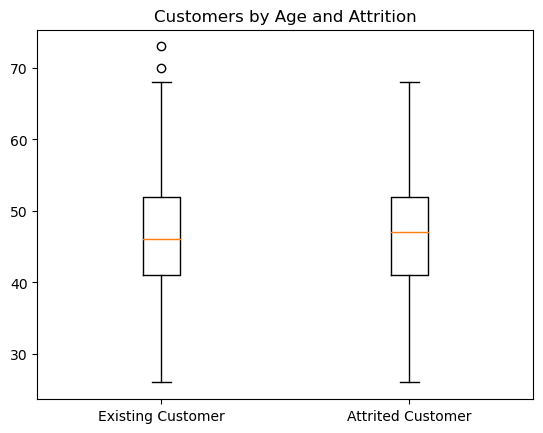

In [8]:
#2 Customer Age
fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Customer_Age"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Customer_Age"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
plt.title("Customers by Age and Attrition")
plt.show()

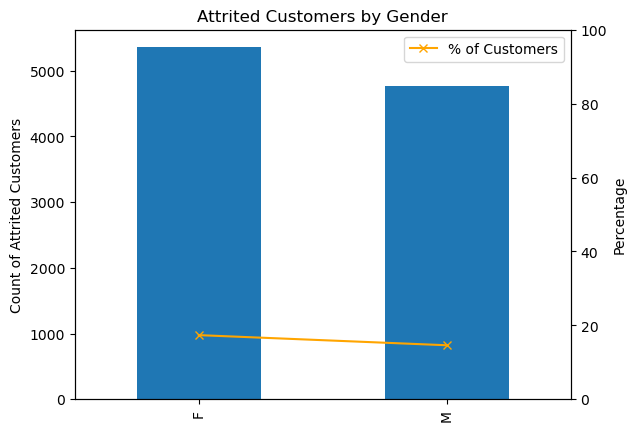

In [9]:
#df of only existing customers
existing = df[df["Attrition_Flag"]=="Existing Customer"]
#df of only attrited customers
attrited = df[df["Attrition_Flag"]=="Attrited Customer"]

#3 Gender
pct_attrited_gender = (attrited["Gender"].value_counts() / df["Gender"].value_counts()) * 100

fig, ax=plt.subplots()
df["Gender"].value_counts().plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(pct_attrited_gender, color="orange", marker="x")
ax2.set_ylim(bottom=0, top=100)
ax.set_ylabel("Count of Attrited Customers")
ax2.set_ylabel("Percentage")
plt.title("Attrited Customers by Gender")
plt.legend(["% of Customers"])
plt.show()

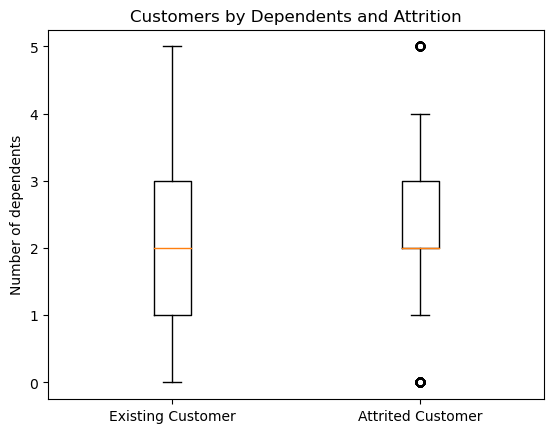

In [50]:
#4 Dependent count
fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Dependent_count"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Dependent_count"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Number of dependents")
plt.title("Customers by Dependents and Attrition")
plt.show()

College          15.202369
Doctorate        21.064302
Graduate         15.569054
High School      15.201192
Post-Graduate    17.829457
Uneducated       15.938130
Unknown          16.853193
Name: Education_Level, dtype: float64


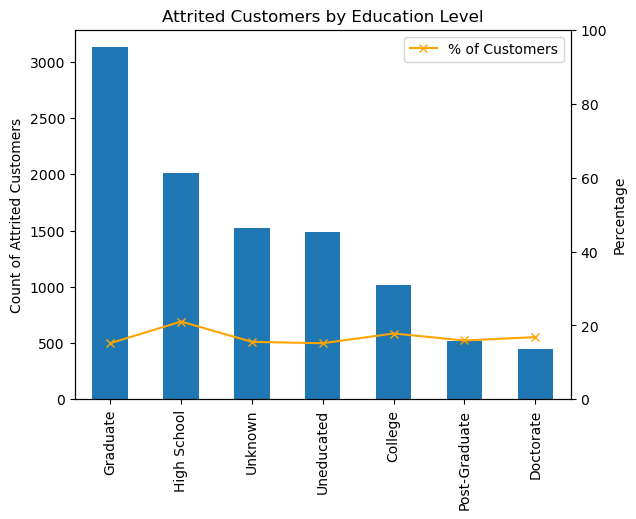

In [10]:
#5 Education
pct_attrited_edu = (attrited["Education_Level"].value_counts() / (attrited["Education_Level"].value_counts() + \
                                                                  existing["Education_Level"].value_counts())) * 100

print(pct_attrited_edu)
fig, ax=plt.subplots()
df["Education_Level"].value_counts().plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(pct_attrited_edu, color="orange", marker="x")
ax2.set_ylim(bottom=0, top=100)
ax.set_ylabel("Count of Attrited Customers")
ax2.set_ylabel("Percentage")
plt.title("Attrited Customers by Education Level")
plt.legend(["% of Customers"])
plt.show()

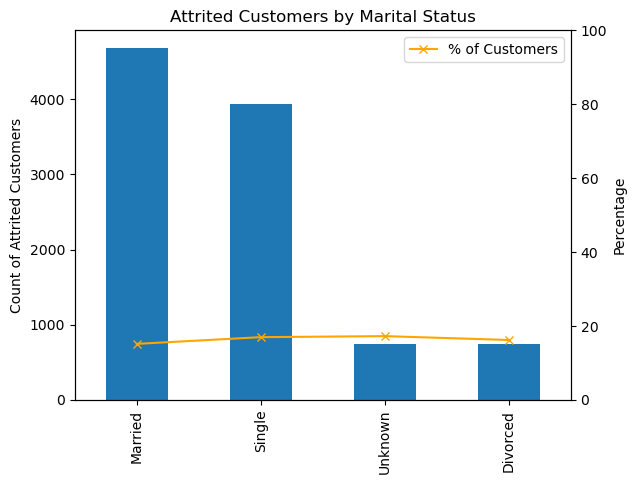

In [14]:
#6 Marital Status
pct_attrited_marital = (attrited["Marital_Status"].value_counts() / df["Marital_Status"].value_counts()) * 100

fig, ax=plt.subplots()
df["Marital_Status"].value_counts().plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(pct_attrited_marital, color="orange", marker="x")
ax2.set_ylim(bottom=0, top=100)
ax.set_ylabel("Count of Attrited Customers")
ax2.set_ylabel("Percentage")
plt.title("Attrited Customers by Marital Status")
plt.legend(["% of Customers"])
plt.show()

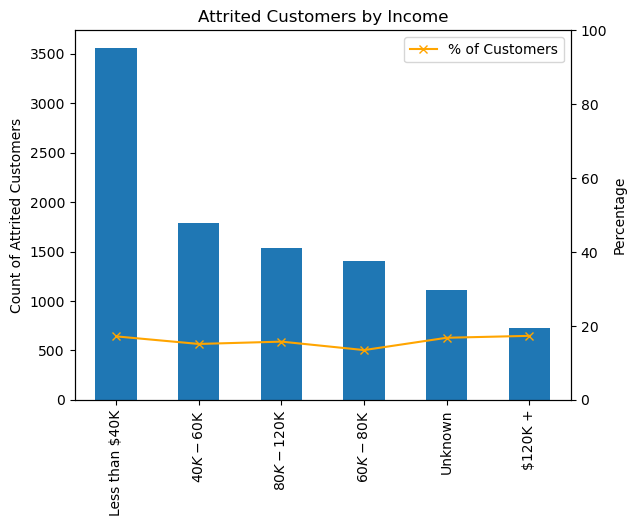

In [15]:
#7 Income
pct_attrited_income = (attrited["Income_Category"].value_counts() / df["Income_Category"].value_counts()) * 100

fig, ax=plt.subplots()
df["Income_Category"].value_counts().plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(pct_attrited_income, color="orange", marker="x")
ax2.set_ylim(bottom=0, top=100)
ax.set_ylabel("Count of Attrited Customers")
ax2.set_ylabel("Percentage")
plt.title("Attrited Customers by Income")
plt.legend(["% of Customers"])
plt.show()

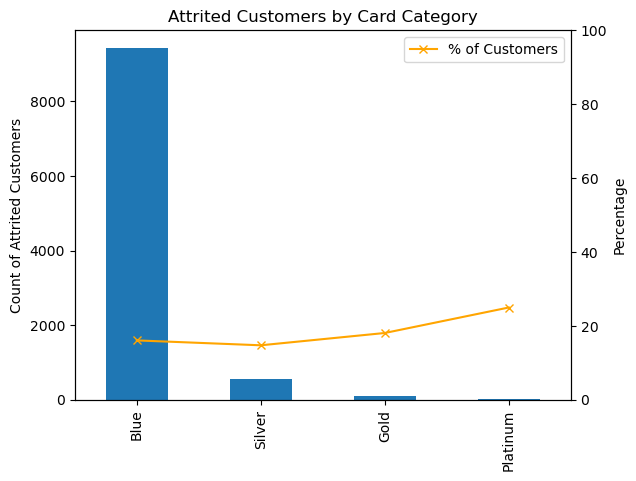

In [16]:
#8 Card Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
pct_attrited_card = (attrited["Card_Category"].value_counts() / df["Card_Category"].value_counts()) * 100

fig, ax=plt.subplots()
df["Card_Category"].value_counts().plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(pct_attrited_card, color="orange", marker="x")
ax2.set_ylim(bottom=0, top=100)
ax.set_ylabel("Count of Attrited Customers")
ax2.set_ylabel("Percentage")
plt.title("Attrited Customers by Card Category")
plt.legend(["% of Customers"])
plt.show()

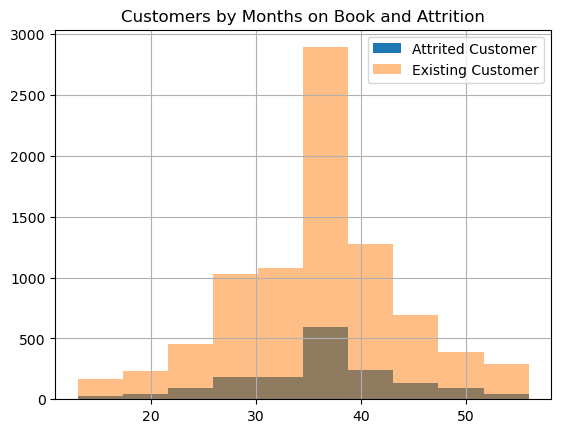

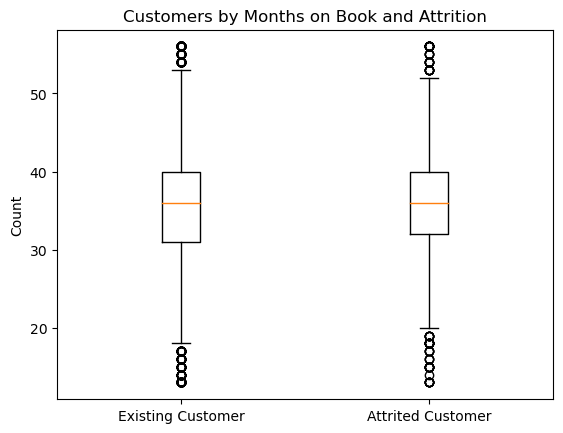

In [15]:
#9 Months on book: period of relationship with bank
df[df["Attrition_Flag"] == "Attrited Customer"]["Months_on_book"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Months_on_book"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Months on Book and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Months_on_book"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Months_on_book"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Count")
plt.title("Customers by Months on Book and Attrition")
plt.show()

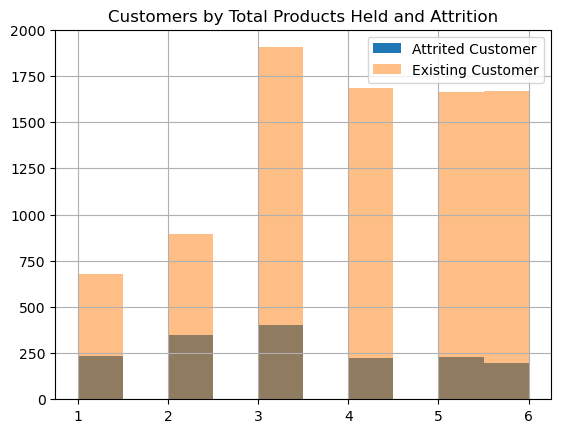

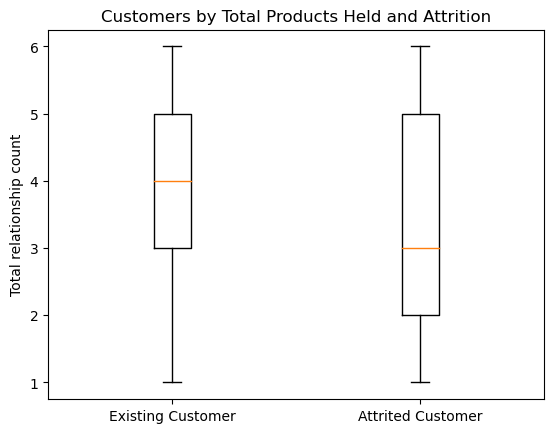

In [16]:
#10 Total no. of products held by the customer
df[df["Attrition_Flag"] == "Attrited Customer"]["Total_Relationship_Count"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Total_Relationship_Count"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Total Products Held and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Total_Relationship_Count"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Relationship_Count"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Total relationship count")
plt.title("Customers by Total Products Held and Attrition")
plt.show()

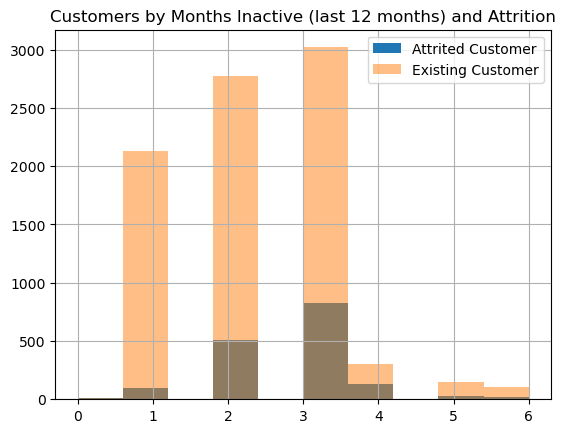

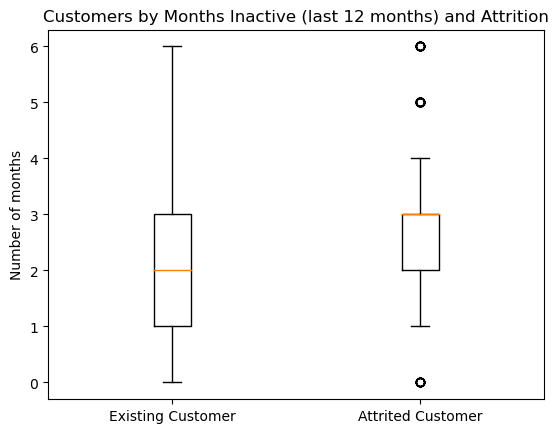

In [93]:
#11 Total Months Inactive within last 12 months 
df[df["Attrition_Flag"] == "Attrited Customer"]["Months_Inactive_12_mon"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Months_Inactive_12_mon"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Months Inactive (last 12 months) and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Months_Inactive_12_mon"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Months_Inactive_12_mon"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Number of months")
plt.title("Customers by Months Inactive (last 12 months) and Attrition")
plt.show()

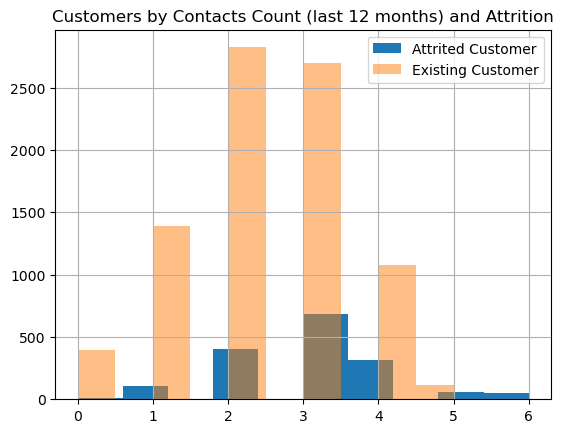

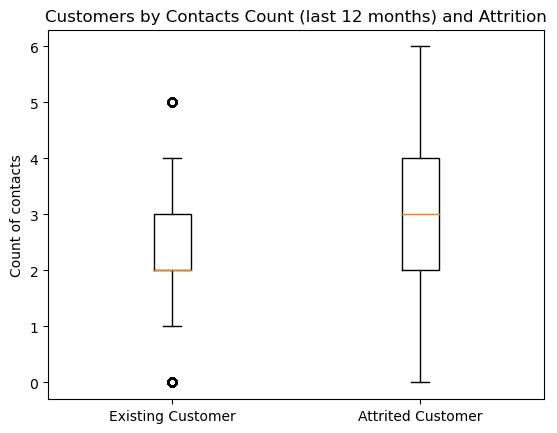

In [17]:
#12 Total Contacts within last 12 months
df[df["Attrition_Flag"] == "Attrited Customer"]["Contacts_Count_12_mon"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Contacts_Count_12_mon"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Contacts Count (last 12 months) and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Contacts_Count_12_mon"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Contacts_Count_12_mon"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Count of contacts")
plt.title("Customers by Contacts Count (last 12 months) and Attrition")
plt.show()

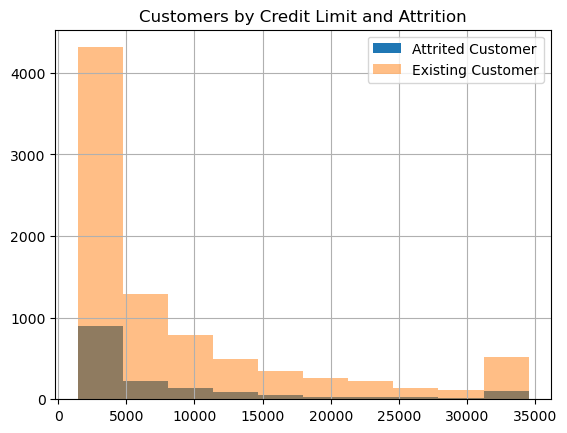

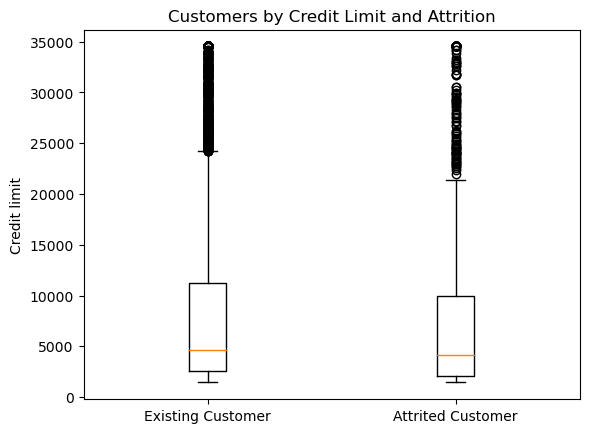

In [94]:
#13 Credit Limit on the Credit Card
df[df["Attrition_Flag"] == "Attrited Customer"]["Credit_Limit"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Credit_Limit"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Credit Limit and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Credit_Limit"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Credit_Limit"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Credit limit")
plt.title("Customers by Credit Limit and Attrition")
plt.show()

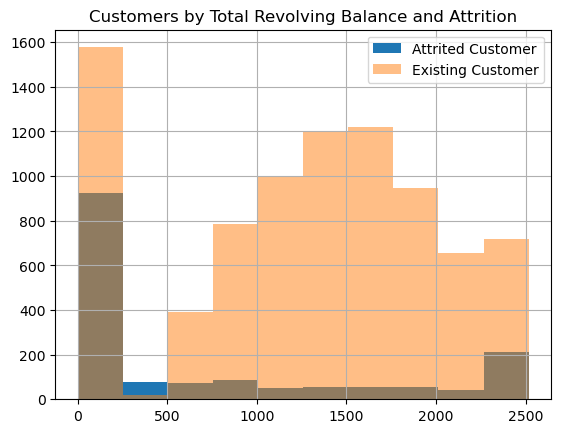

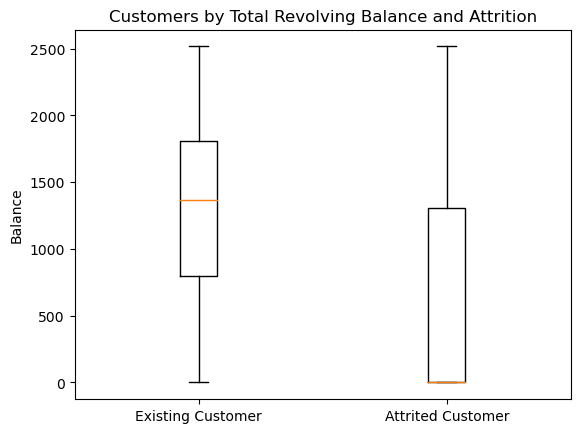

In [44]:
#14 Total Revolving Balance
df[df["Attrition_Flag"] == "Attrited Customer"]["Total_Revolving_Bal"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Total_Revolving_Bal"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Total Revolving Balance and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Total_Revolving_Bal"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Revolving_Bal"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Balance")
plt.title("Customers by Total Revolving Balance and Attrition")
plt.show()

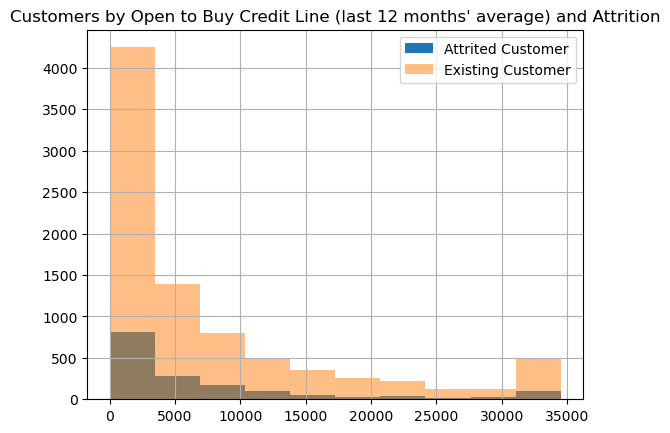

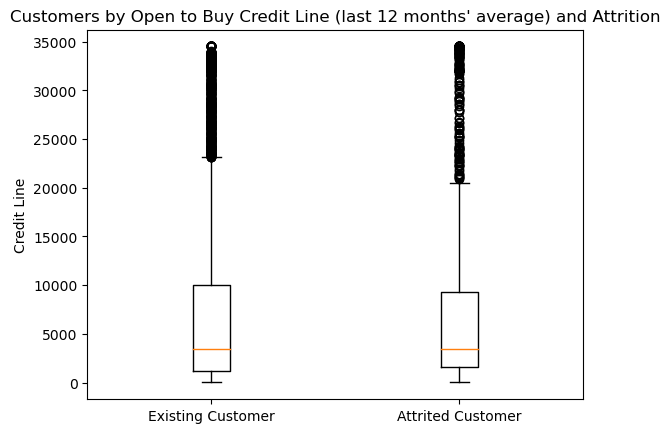

In [62]:
#15 Credit Line: Open to Buy Credit Line (Average of last 12 months)
df[df["Attrition_Flag"] == "Attrited Customer"]["Avg_Open_To_Buy"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Avg_Open_To_Buy"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Open to Buy Credit Line (last 12 months' average) and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Avg_Open_To_Buy"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Avg_Open_To_Buy"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Credit line")
plt.title("Customers by Open to Buy Credit Line (last 12 months' average) and Attrition")
plt.show()

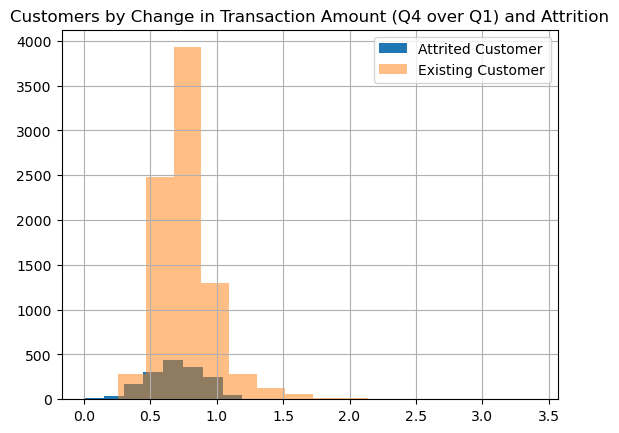

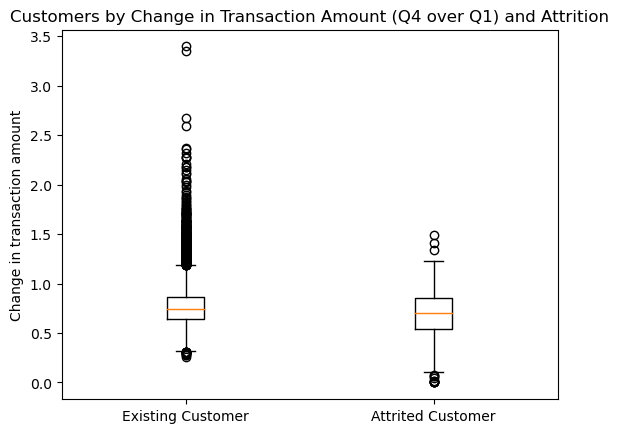

In [83]:
#16 Change in Transaction Amount (Q4 over Q1)
df[df["Attrition_Flag"] == "Attrited Customer"]["Total_Amt_Chng_Q4_Q1"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Total_Amt_Chng_Q4_Q1"].hist(alpha=0.5,bins=15)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Change in Transaction Amount (Q4 over Q1) and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Total_Amt_Chng_Q4_Q1"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Amt_Chng_Q4_Q1"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Change in transaction amount")
plt.title("Customers by Change in Transaction Amount (Q4 over Q1) and Attrition")
plt.show()

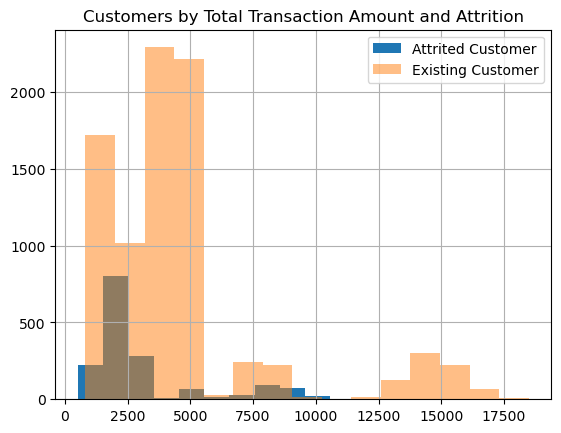

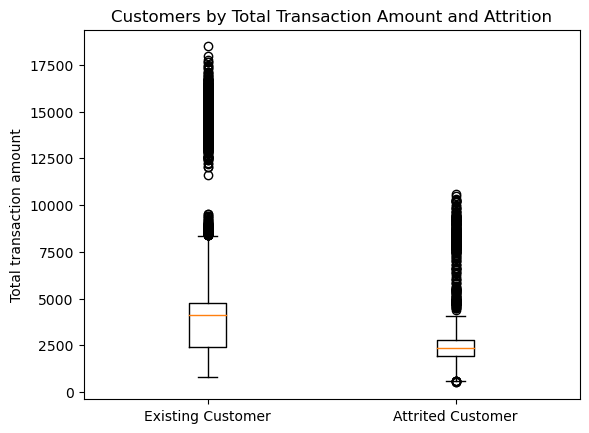

In [87]:
#17 Total Transaction Amount (Last 12 months)
df[df["Attrition_Flag"] == "Attrited Customer"]["Total_Trans_Amt"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Total_Trans_Amt"].hist(alpha=0.5,bins=15)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Total Transaction Amount and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Total_Trans_Amt"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Trans_Amt"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Total transaction amount")
plt.title("Customers by Total Transaction Amount and Attrition")
plt.show()

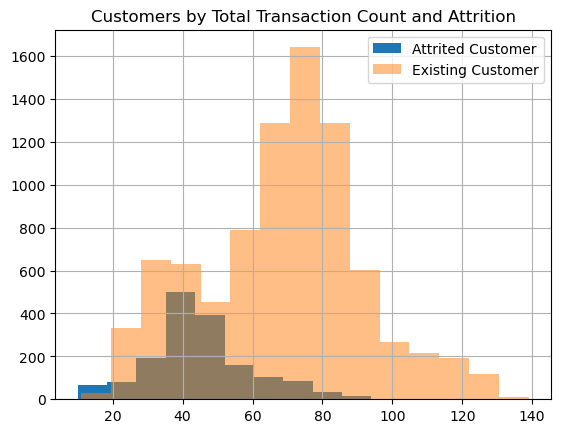

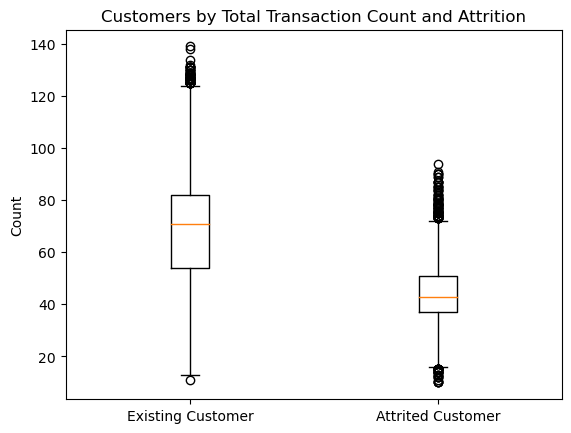

In [72]:
#18 Total Transaction Count (Last 12 months)
df[df["Attrition_Flag"] == "Attrited Customer"]["Total_Trans_Ct"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Total_Trans_Ct"].hist(alpha=0.5,bins=15)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Total Transaction Count and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Total_Trans_Ct"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Trans_Ct"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Count")
plt.title("Customers by Total Transaction Count and Attrition")
plt.show()

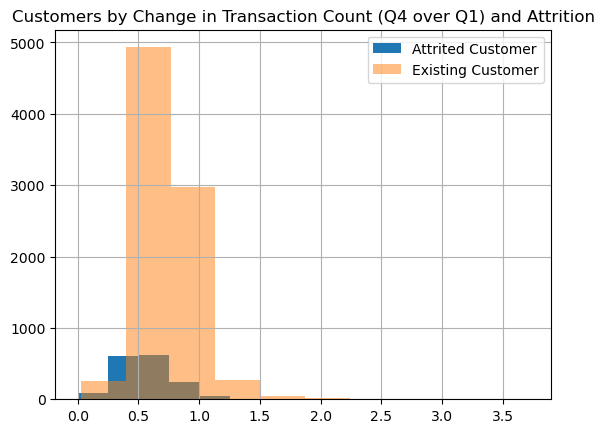

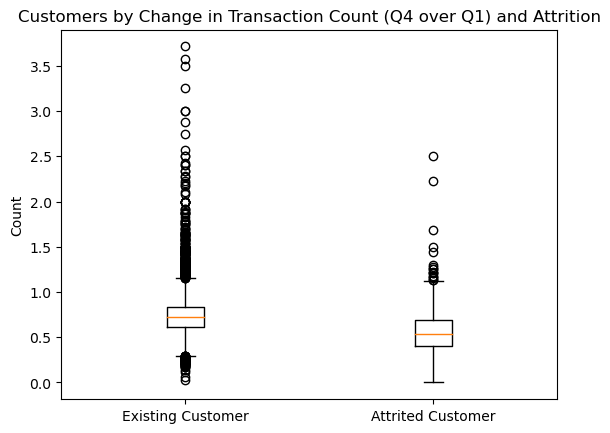

In [96]:
#19 Change in Transaction Count (Q4 over Q1)
df[df["Attrition_Flag"] == "Attrited Customer"]["Total_Ct_Chng_Q4_Q1"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Total_Ct_Chng_Q4_Q1"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Change in Transaction Count (Q4 over Q1) and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Total_Ct_Chng_Q4_Q1"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Ct_Chng_Q4_Q1"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Count")
plt.title("Customers by Change in Transaction Count (Q4 over Q1) and Attrition")
plt.show()

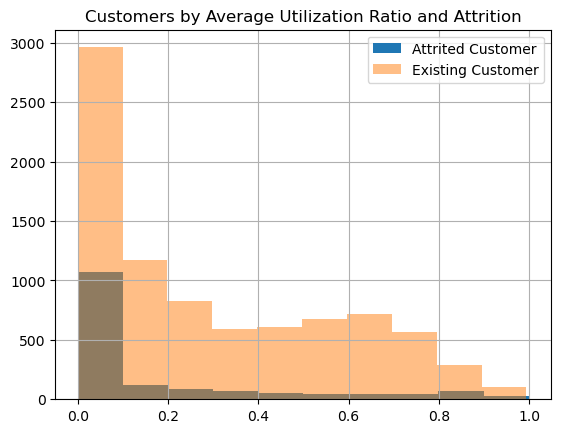

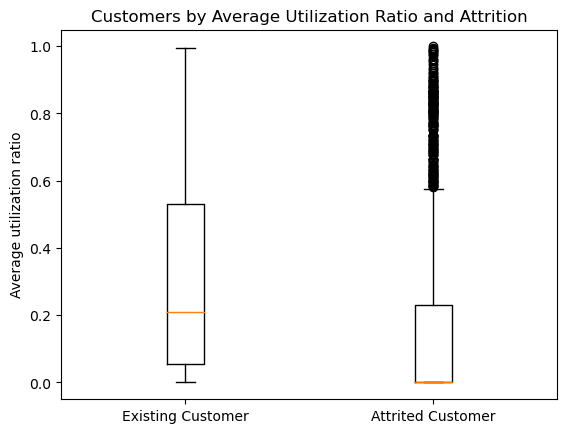

In [19]:
#20 Average Card Utilization Ratio
df[df["Attrition_Flag"] == "Attrited Customer"]["Avg_Utilization_Ratio"].hist()
df[df["Attrition_Flag"] == "Existing Customer"]["Avg_Utilization_Ratio"].hist(alpha=0.5)
plt.legend(["Attrited Customer", "Existing Customer"])
plt.title("Customers by Average Utilization Ratio and Attrition")

fig, ax = plt.subplots()
ax.boxplot([df[df["Attrition_Flag"]=="Existing Customer"]["Avg_Utilization_Ratio"],\
           df[df["Attrition_Flag"]=="Attrited Customer"]["Avg_Utilization_Ratio"]])
ax.set_xticklabels(["Existing Customer", "Attrited Customer"])
ax.set_ylabel("Average utilization ratio")
plt.title("Customers by Average Utilization Ratio and Attrition")
plt.show()

C:\Users\Cheuk-Ning Li\AppData\Local\Temp\ipykernel_6288\1082128586.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_df = df.corr()


<Axes: >

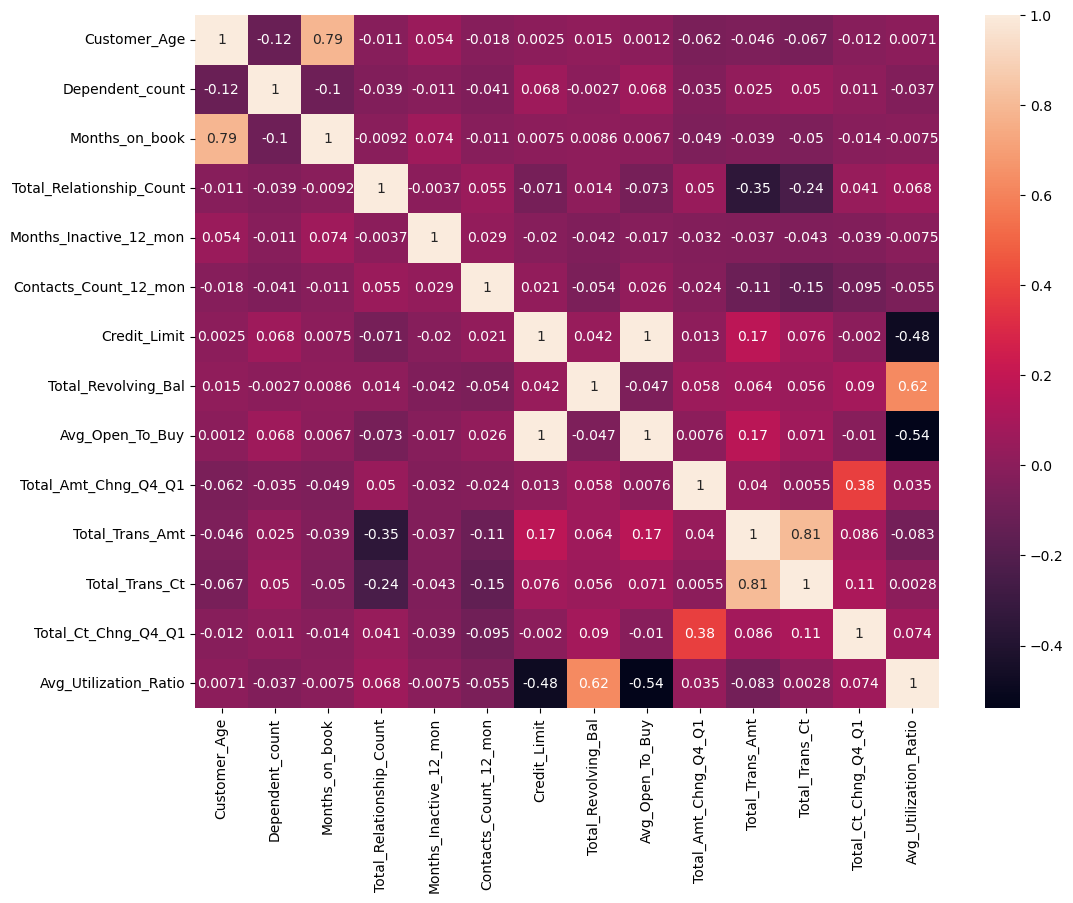

In [13]:
#for f in range(len(df)):    
#   if df.iloc[f,1] == "Attrited Customer":
#       df.iloc[f,1] = 1
#   else:
#       df.iloc[f,1] = 0        

#correlated_df = df.drop(columns="CLIENTNUM",inplace=True)
correlated_df = df.corr()
#correlated_df = correlated_df.iloc[1:,0:]
plt.figure(figsize=(12,9))
sns.heatmap(correlated_df,annot=True)

# Insights

- The majority of this dataset is made up of Existing Customers. Could present difficulties in modeling factors in Attrited Customers.

- The biggest existing customer demographics are people with graduate degrees, have an income of <$40k, and blue card holders. There are slightly more customers who are female, and/or married. Most customers are between the ages of 40-50, and have a median of 2 dependents.

- Normal distributions existed in both existing and attrited customers for Months on Book, Months Inactive, Contacts Count, Change in Transaction Amount, Change in Transaction Count, Total Transaction Count for attrited customers, and Total Relationship Count (products held) by attrited customers.

- Variables with distributions skewed right for both existing and attrited customers include Credit Limit, Open to Buy Credit Line, and Average Utilization Ratio. However, there existed a small but noticeable uptick (of outliers) in the last bin for both Credit Limit and Open to Buy Credit Line for both sets of customers.

- Variables with anomalous distributions include Total Relationship Count for existing customers, Total Transaction Count for existing customers, Total Revolving Balance for both sets of customers, and Total Transaction Amount for both sets of customers.

- Upon conducting a Pearson's correlation among the variables, only a handful of moderate to strong correlations were discovered. These include Total Transaction Amount with Total Transaction Count (.81), Customer Age with Months on Book (.79), Total Revolving Balance with Average Utilization Ratio (.62), and Average Open to Buy Credit Line with Average Utilization Ratio (-.54). There is a weak correlation between Credit Limit with Average Utilization Ratio (-.48), as well as Total Transaction Amount Change with Total Transaction Count Change (.38).

- Pearson's correlation isn't conducted on categorical variables such as Attrition Flag with the .corr() method. 